In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [5]:
file_path = '../data/Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print(data.shape)
print(data.info())
print(data.describe())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [9]:
# Check for missing values
print(data.isnull().sum())

# # For 'TotalCharges', convert to numeric (it often has spaces instead of numbers)
# data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# print(data['TotalCharges'].isnull().sum())  # now this shows actual missing values


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [181]:
# Data Cleaning
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)
data.drop('customerID', axis=1, inplace=True)

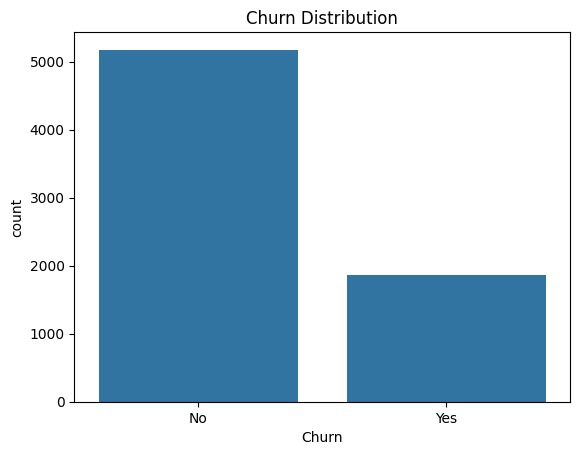

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

print(data['Churn'].value_counts(normalize=True))


In [14]:
# Separate numerical and categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('customerID')  # drop ID column
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical:", cat_cols)
print("Numerical:", num_cols)


Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


### Univariate Analysis

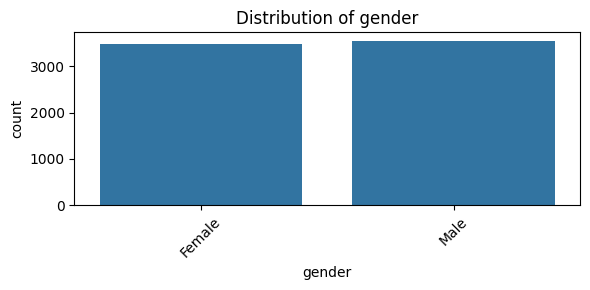

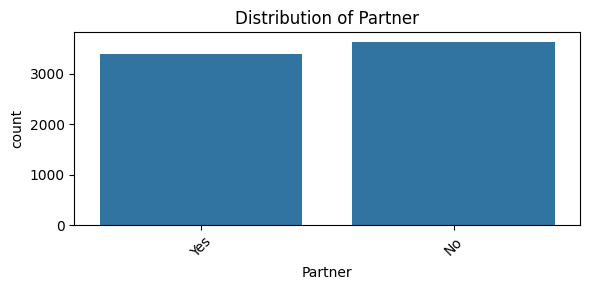

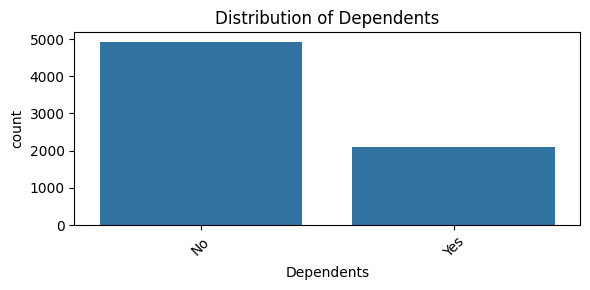

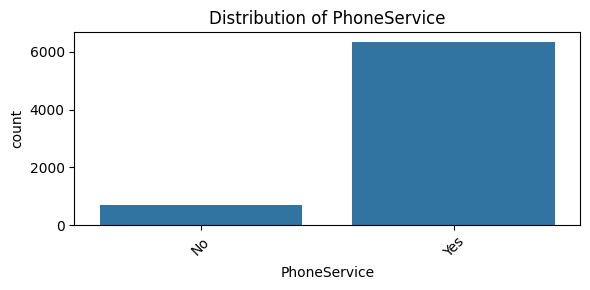

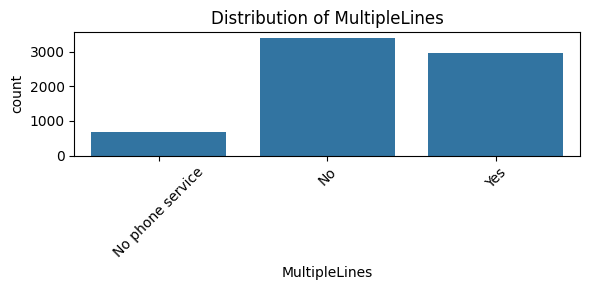

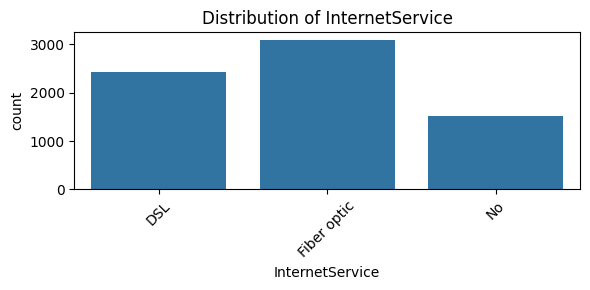

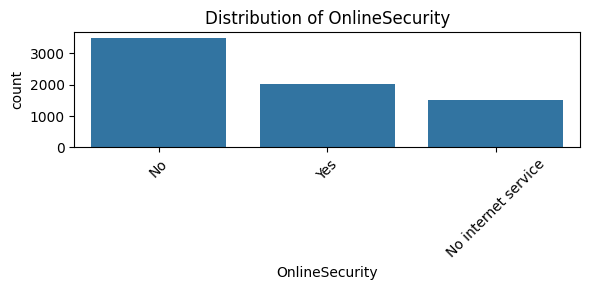

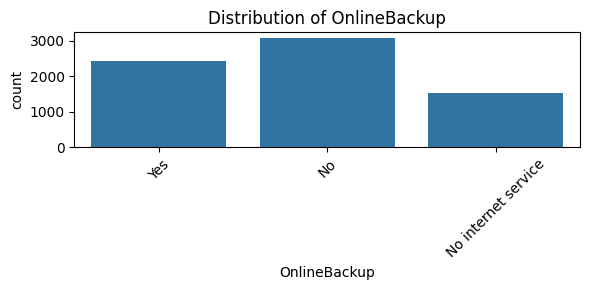

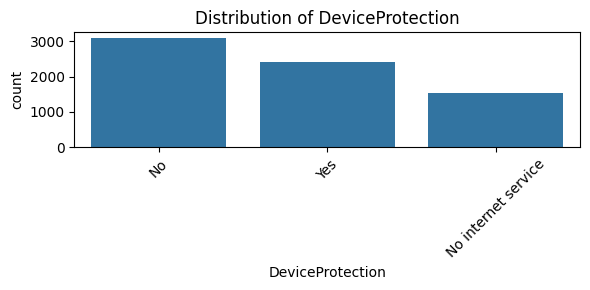

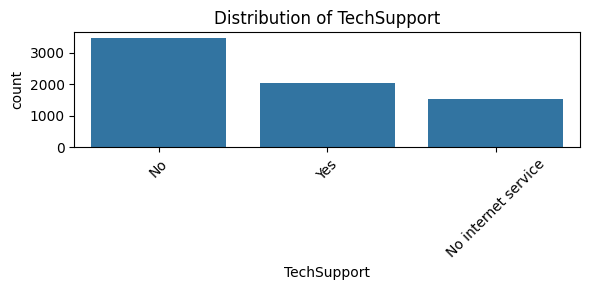

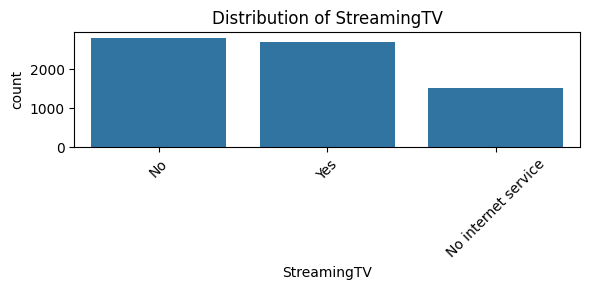

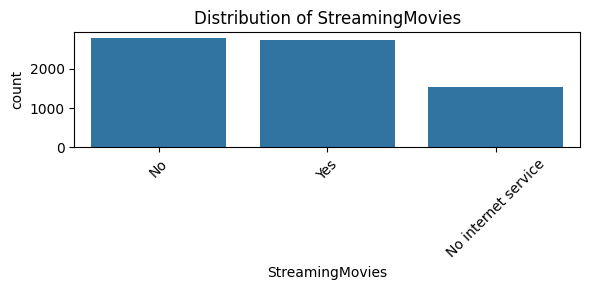

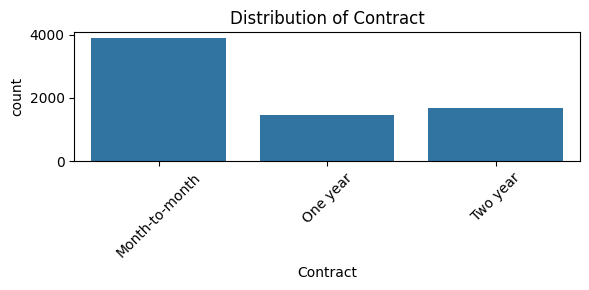

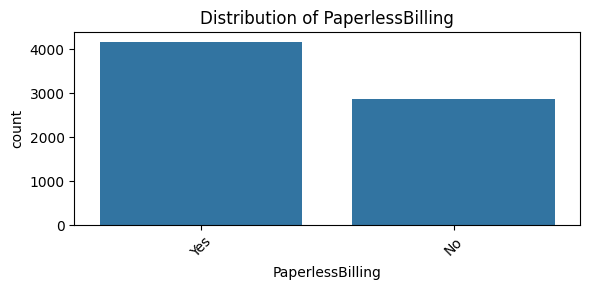

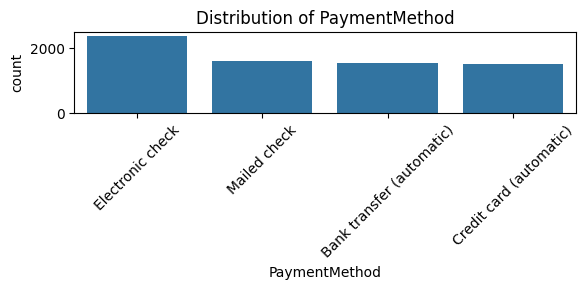

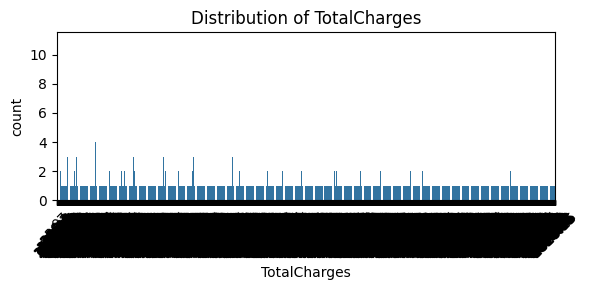

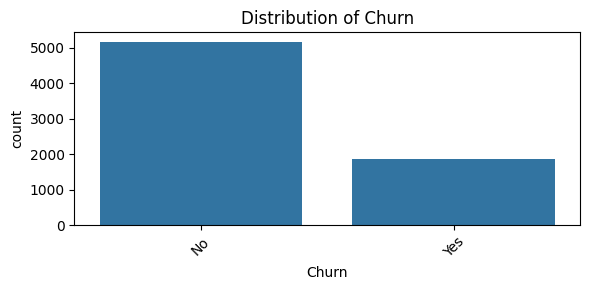

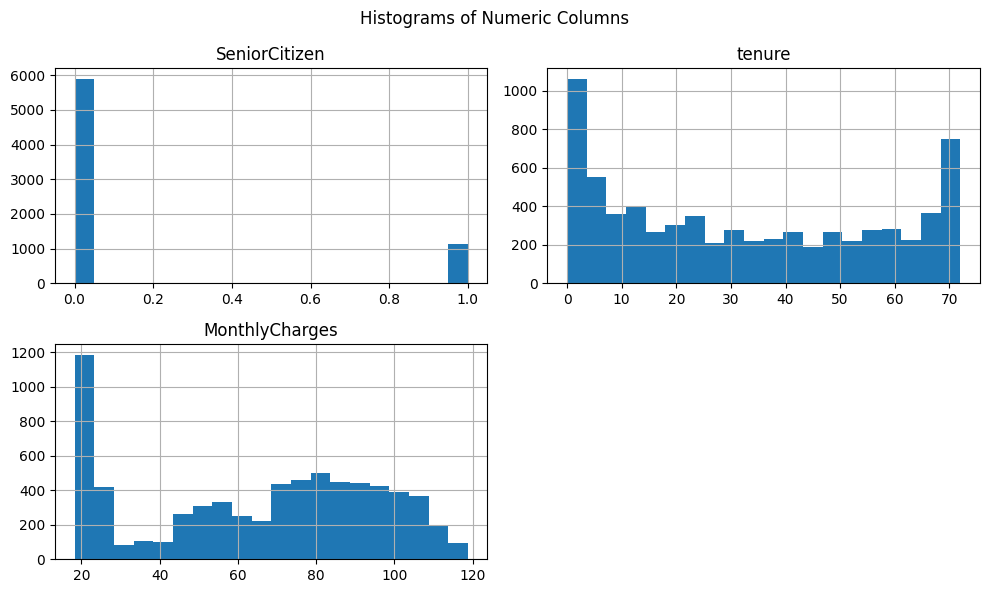

In [16]:
# Categorical
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Numerical
data[num_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("Histograms of Numeric Columns")
plt.tight_layout()
plt.show()


### Bivariate

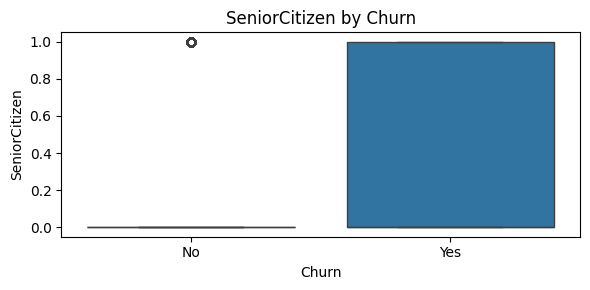

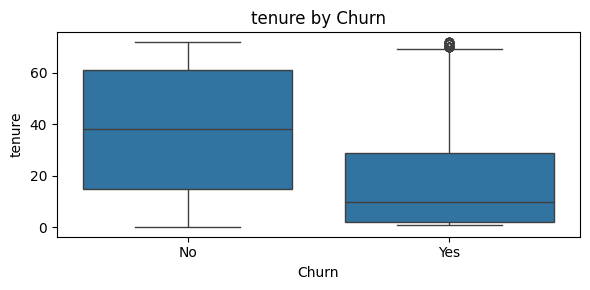

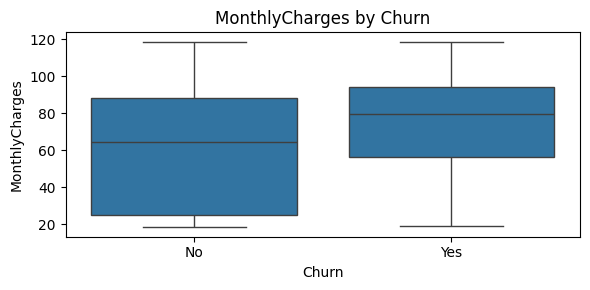

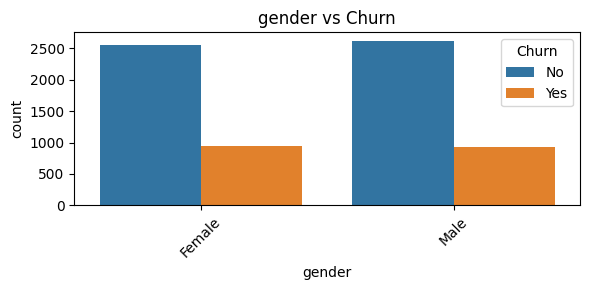

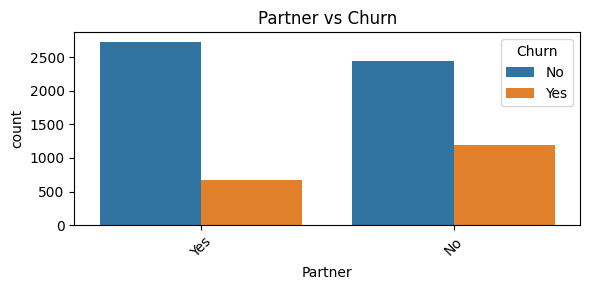

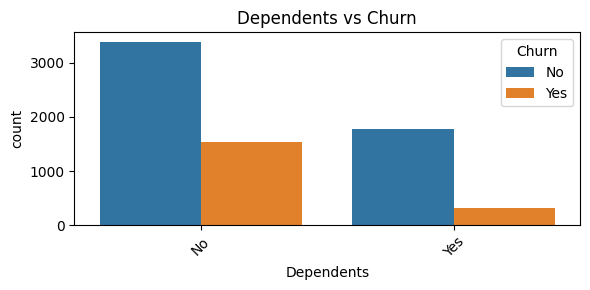

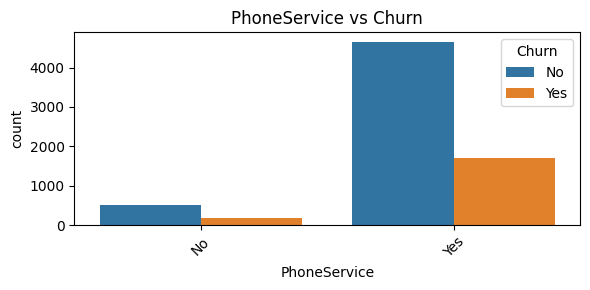

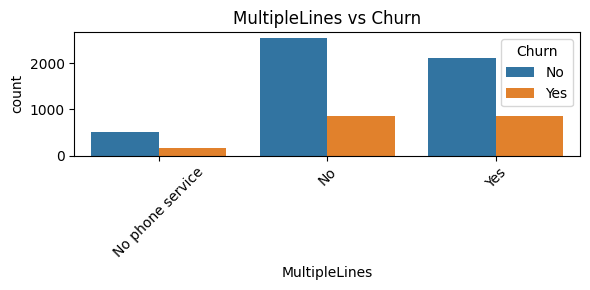

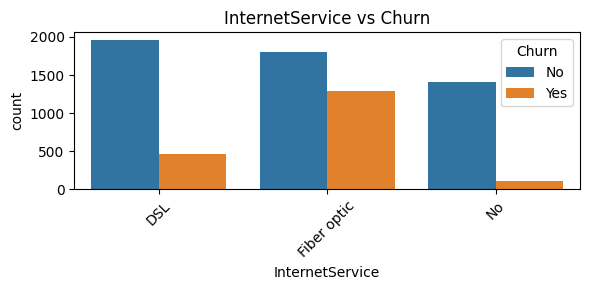

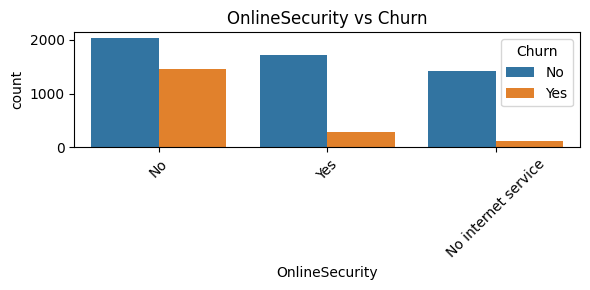

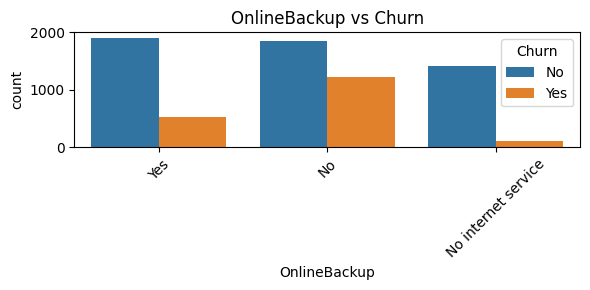

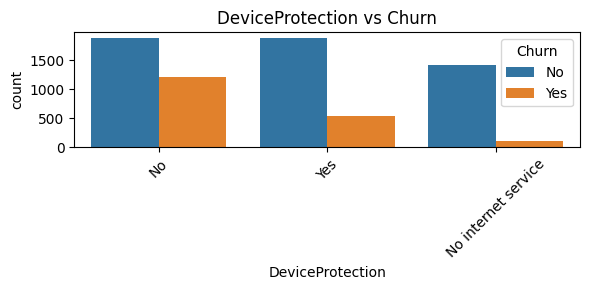

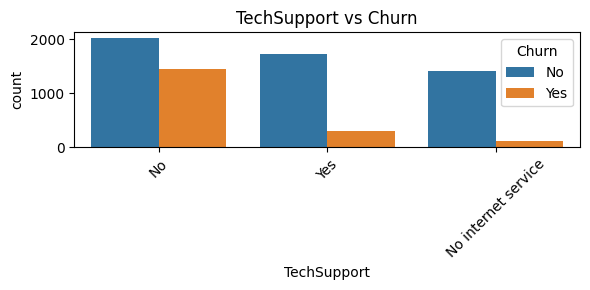

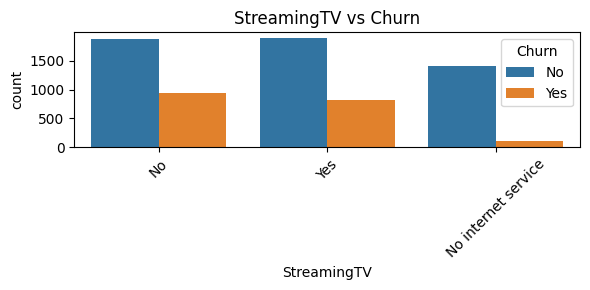

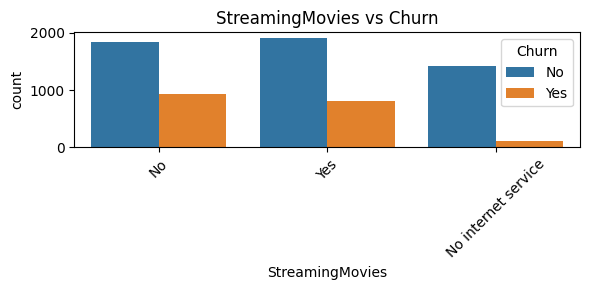

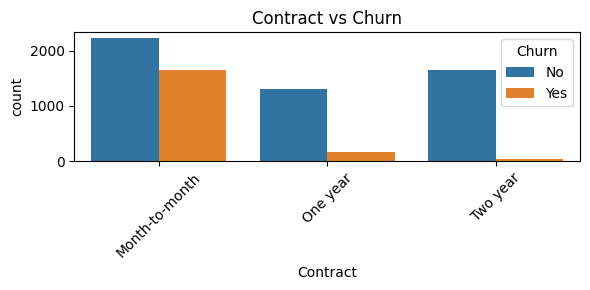

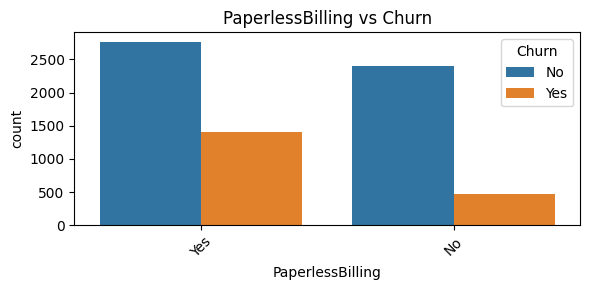

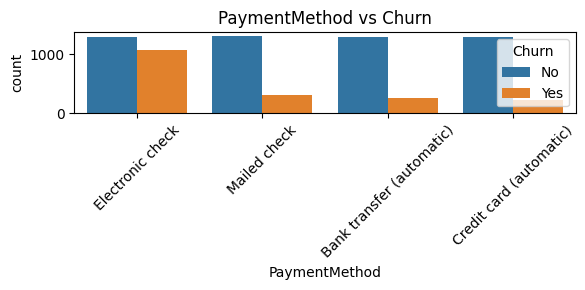

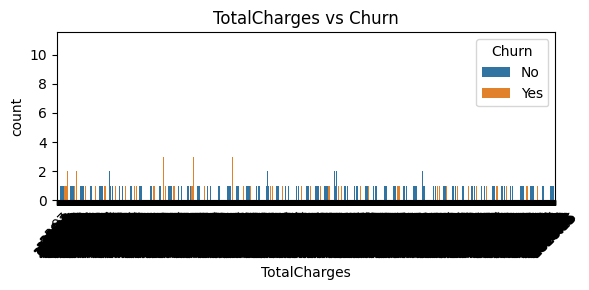

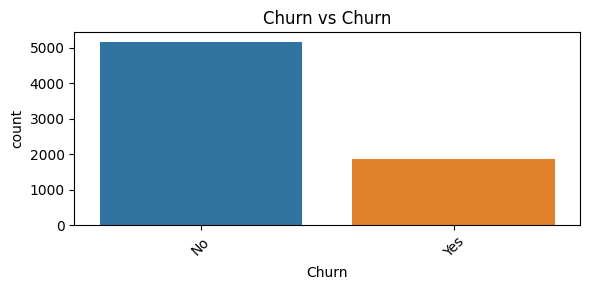

In [18]:
# Churn vs Numerical
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} by Churn')
    plt.tight_layout()
    plt.show()

# Churn vs Categorical
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()


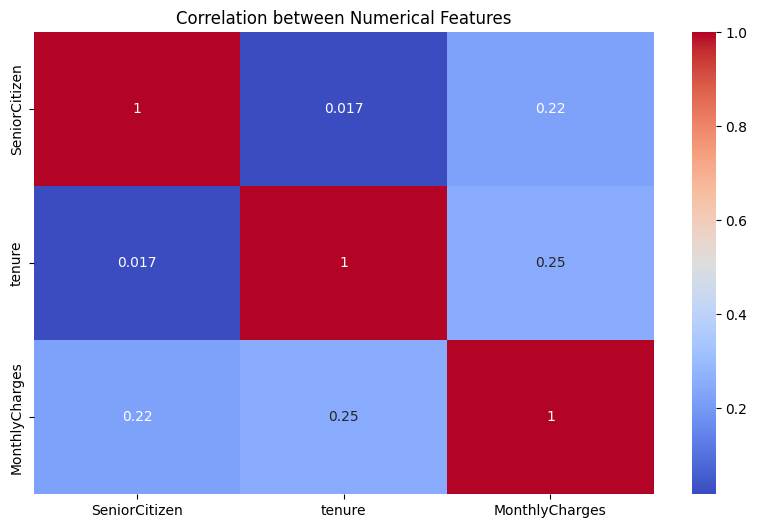

In [19]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical Features")
plt.show()


In [182]:
replace_no_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in replace_no_services:
    data[col] = data[col].replace({'No internet service': 'No'})

data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})


In [183]:
print(data.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1            No             DSL            Yes           No              Yes   
2            No             DSL            Yes          Yes               No   
3            No             DSL            Yes           No              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No       

In [184]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (including manually specified ones)
cat_columns = list(data.select_dtypes(include=['object']).columns)

# Manually include 'SeniorCitizen' if it's binary categorical
if 'SeniorCitizen' in data.columns and data['SeniorCitizen'].nunique() <= 2:
    cat_columns.append('SeniorCitizen')

# Encode all categorical columns
encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# # Print label encodings
# for col, le in encoders.items():
#     print(f"\nColumn: {col}")
#     for i, class_ in enumerate(le.classes_):
#         print(f"  {i} => {class_}")


In [185]:
print(data['Churn'].value_counts(normalize=True))


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [186]:
# Features and Target
X = data.drop('Churn', axis=1)
y = data['Churn']


In [187]:
#  Check class balance
print(y.value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


In [188]:
#  Synthetic Oversampling if needed
if y.value_counts()[0]/y.value_counts()[1] > 1.5:
    print("Applying SMOTE...")
    smote = SMOTE()
    X, y = smote.fit_resample(X, y)

Applying SMOTE...


In [189]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
#  Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
#  Model Training
model = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# log_reg_model = LogisticRegression(random_state=42)
# log_reg_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       random_state=42)

In [192]:
#  Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1037
           1       0.83      0.84      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

ROC AUC Score: 0.835921722318904


In [193]:
#  Save model and scaler
joblib.dump(model, '../models/churn_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(encoders, '../models/encoders.pkl')

print("Model and Scaler Saved Successfully")

Model and Scaler Saved Successfully


In [194]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [195]:
sample = pd.DataFrame([{
    'gender': '0', 
    'SeniorCitizen': '0', 
    'Partner': '0', 
    'Dependents': '0', 
    'tenure': '9', 
    'PhoneService': '0', 
    'MultipleLines': '0', 
    'InternetService': '1', 
    'OnlineSecurity': '0', 
    'OnlineBackup': '0', 
    'DeviceProtection': '0', 
    'TechSupport': '1', 
    'StreamingTV': '1', 
    'StreamingMovies': '0', 
    'Contract': '0', 
    'PaperlessBilling': '0', 
    'PaymentMethod': '1', 
    'MonthlyCharges': '95.75', 
    'TotalCharges': '270.50'
    }])



In [196]:
log_reg_model.predict_proba(sample)


C:\Users\saika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[0., 1.]])

In [197]:
threshold = 0.4  # Any probability greater than 45% will be considered as churn (1)

# Get the predicted class based on the new threshold
y_pred_custom = (log_reg_model.predict_proba(sample)[:, 1] > threshold).astype(int)
print(f"Predicted Churn: {'Yes' if y_pred_custom == 1 else 'No'}")

Predicted Churn: Yes


C:\Users\saika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [198]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [199]:
print(data.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               0             1   
1              0                0               1             0   
2              0                0               1             1   
3              0                0               1             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 